1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
import pandas as pd

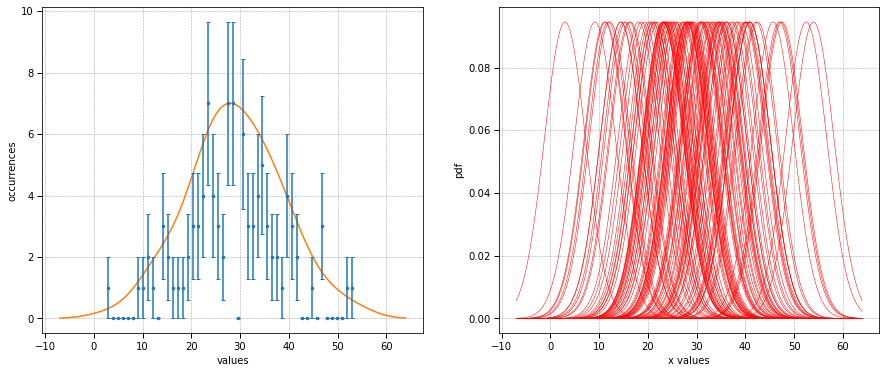

In [2]:
N=100; mean=30; std=10;
x=np.random.randn(N,1)*std+mean # random vector with normal distribution

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax1.grid(linestyle="--", linewidth=0.6, zorder=-10);
ax1.set_xlabel('values');
ax1.set_ylabel('occurrences');
ax1.tick_params(which='major', width=1.0, length=5, labelsize=10);
ax1.tick_params(which='minor', width=1.0, length=5, labelsize=10);

H,binedges=np.histogram(x,N//2); # histogram calculation
error=np.sqrt(H); # error = uncertainty of a Poisson R.V. (one for each x) on the y-axis (i.e. std=sqrt(var)=sqrt(mean))
ax1.errorbar(binedges[0:len(binedges)-1],H, error, fmt='.', markersize=5, capsize=2, zorder=10); # scatter plot

ax2 = fig.add_subplot(1, 2, 2);
ax2.grid(linestyle="--", linewidth=0.6, zorder=-10);
ax2.set_xlabel('x values');
ax2.set_ylabel('pdf');
ax2.tick_params(which='major', width=1.0, length=5, labelsize=10);
ax2.tick_params(which='minor', width=1.0, length=5, labelsize=10); 


std_default=1.06*std*x.size**(-1/5); # default std dev of the gaussians.

std_tuned=std_default; # std dev of the gaussians that can be tuned. The higher the smoother the KDE.

N_KDE=1000; # Number of values for the KDE (How "edgy" it is, the higher the smoother)
x_vals=np.linspace(binedges[0]-std, binedges[-1]+std, N_KDE) # x values for the KDE

KDE=np.zeros((N_KDE,));
for mean in x: #every element in x is the mean of a Gaussian R.V.
    ax2.plot(x_vals, sp.stats.norm(mean, std_tuned).pdf(x_vals), 'r', linewidth=0.5, zorder=10); # plot N(x,std_tuned)
    KDE+=sp.stats.norm(mean, std_tuned).pdf(x_vals); # sums at each iteration the gaussian N(x,std_tuned)
    
KDE=KDE/max(KDE)*max(H) # Normalization

ax1.plot(x_vals, KDE); # plot of the KDE

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D dataset of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

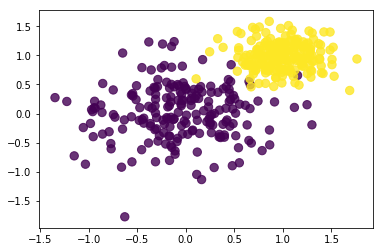

In [3]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

Category 0  \
0       (-0.09479107270748222, 0.5361471499464918)   
1      (-0.23687155796925935, -0.3563378811253457)   
2       (-0.2786734811713432, 0.19432629989217834)   
3      (-0.21931892901343117, -0.8560568742380745)   
4       (0.03918483731010364, -0.9356833497391173)   
..                                             ...   
495      (0.11433629000449824, 0.3357610636385701)   
496   (-0.025832056888363698, 0.22853566528171942)   
497  (-0.007002790736653407, -0.37545445586021253)   
498     (-0.3586738785314063, 0.13136925345692993)   
499    (-0.014250451687689989, 0.4824057112203211)   

                                   Category 1  \
0    (1.4287913337191087, 0.6876522759498549)   
1    (0.9781143571379006, 0.8758180508801882)   
2     (1.3436691654772832, 0.766205853220605)   
3     (1.0599142423979004, 1.242629791526874)   
4    (0.5329759678466636, 0.9384580431745485)   
..                                        ...   
495  (1.1708943103003544, 0.6900023658802166)   
496  (1.3471010039331646, 0.6930034356980723)   
497  (0.4893141162634608, 0.7996597049317814)   
498    (1.184701766442353, 1.254095400727032)   
499  (0.8069169854557954, 0.9831233282874332)   

                                   Category 2  
0    (1.6078420003927159, 1.1960533811637557)  
1    (1.4810540146042668, 1.6773098317249724)  
2       (1.424039459903509, 1.61415484696697)  
3     (1.942829735623296, 1.8503431871796723)  
4    (0.8543700478844805, 1.3147133465195664)  
..                                        ...  
495  (1.3719830214768118, 1.3824047467354157)  
496    (1.795047086252701, 1.285104075492257)  
497   (1.709909216230583, 1.2459241245876647)  
498  (1.1668061557065985, 0.8975942173208695)  
499  (0.8650624767004511, 1.4474741899311385)  

[500 rows x 3 columns]

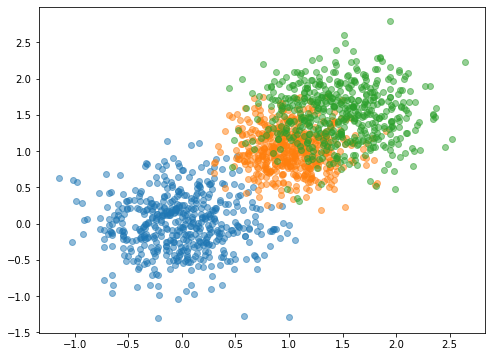

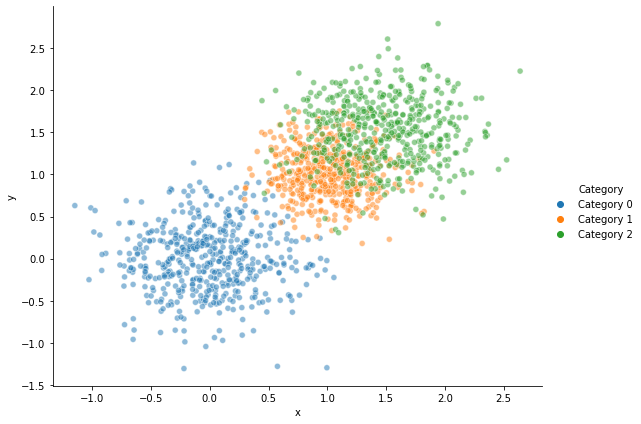

In [8]:
def Dataset_2D(mean, std):
    if len(mean)!=len(std):
        raise Exception("mean and std must have the same length.") # each gaussian must have its own mean and variance!
        
    df=pd.DataFrame()
    for i in range(len(mean)):
        data = np.random.multivariate_normal(mean, cov, 500)
df = pd.DataFrame(data, columns=["x", "y"])
        Gauss_2D=np.random.randn(500,2)*std[i]+mean[i] # 2D gaussian with mean and std given
        Category=list(zip(Gauss_2D[:,0], Gauss_2D[:,1])) # zipping the x and y into a tuple
        Category = pd.DataFrame(Category, columns=['x','y']) # making a dataframe out of it...
        df = pd.concat([df, Category[['x','y']].apply(tuple,axis=1)], axis=1) # ...and concatenating horizontally with df
        df.rename(columns = {list(df)[i]: 'Category %i' %i}, inplace = True) # renaming "Category i-th" the columns
    return df # returns the dataset with all the categories


mean = [0, 1, 1.5] # mean...
std = [.4, .3, .4] # ...and std can have as many values as you want!
ds=Dataset_2D(mean, std)

###  PLOTS ###

fig = plt.figure(figsize=(8, 6))
for cat in ds:
    plt.scatter([x[0] for x in ds[cat]], [y[1] for y in ds[cat]], alpha=0.5); #simply using plt...

to_plot=pd.DataFrame(columns=['x','y','Category'])
for cat in ds:
    x = pd.DataFrame([x[0] for x in ds[cat]], columns=['x'])
    y = pd.DataFrame([y[1] for y in ds[cat]], columns=['y'])
    c = pd.DataFrame([cat for i in range(len(x))], columns=['Category'])
    to_plot=pd.concat([to_plot, pd.concat([x,y,c], axis=1)], axis=0)    
sns.relplot(x='x', y='y', hue='Category', data=to_plot, height=6, aspect=1.3, alpha=0.5) # ...or using seaborn

ds

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot